In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# from sklearn.feature_selection import r_regression
# from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
# load utilities

%run ./utility/utilities.py

/Users/4476224/.local/lib/python3.8/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.11.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
!jupyter --version

Selected Jupyter core packages...
IPython          : 8.12.2
ipykernel        : 6.29.5
ipywidgets       : 8.1.3
jupyter_client   : 8.6.2
jupyter_core     : 5.7.2
jupyter_server   : 2.7.0
jupyterlab       : 4.2.3
nbclient         : 0.10.0
nbconvert        : 7.16.4
nbformat         : 5.10.4
notebook         : 7.2.1
qtconsole        : 5.5.2
traitlets        : 5.14.3


## Training and Testing dataset (6 robust predictive features) 

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)

# load data
data = pd.read_csv('data/Xy_16f_86p_midas.csv')

Ndata = data[['Age_at_Surgery','BMI','Histology','Number_of_fragments_plated_tumor',\
              'Sample_weight_g_tumor','Tumor_digest_count_primary_tumor','OverallTILGrowth']].copy()
              
              


In [5]:
# # (B001 - B131) 

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_row', None)

# # load data
# data = pd.read_excel('data/BladderCancer_132P_TIL_prd1.xlsx')
# data = data.loc[0:130]

# Ndata = data[['ID','Surgeon','Age_at_Surgery','Race','Surgery','Smoker','BMI',\
#               'NAC','cT','pT','cT_or_pT','pN','Bx_Histology','Histology',\
#               'Sample_weight_g_tumor','Tumor_digest_count_primary_tumor','Number_of_fragments_plated_tumor',\
#               'Overall_TIL_growth']].copy()

# Ndata = Ndata.replace(to_replace="Yes",value="Yes TIL")
# Ndata = Ndata.replace(to_replace="No",value="No TIL")

# Ndata = Ndata.replace(r'^\s*$', np.nan, regex=True) # Replace Blank values with DataFrame.replace() methods.

# Extracted_col0 = Ndata.iloc[:,0:1]  # "ID"
# Extracted_col1 = Ndata['Surgeon']
# Extracted_col2 = Ndata['Age_at_Surgery']
# Extracted_col3 = Ndata['BMI']
# Extracted_col4 = Ndata['cT_or_pT']
# # Extracted_col5 = Ndata['Histology'] # may remove
# Extracted_col6 = Ndata['Sample_weight_g_tumor']
# Extracted_col7 = Ndata['Tumor_digest_count_primary_tumor']
# Extracted_col8 = Ndata['Number_of_fragments_plated_tumor']
# Extracted_col9 = Ndata['Overall_TIL_growth']

# ndata_sel = Extracted_col0
# ndata_sel = ndata_sel.join(Extracted_col1)
# ndata_sel = ndata_sel.join(Extracted_col2)
# ndata_sel = ndata_sel.join(Extracted_col3)
# ndata_sel = ndata_sel.join(Extracted_col4)
# # ndata_sel = ndata_sel.join(Extracted_col5) # may remove
# ndata_sel = ndata_sel.join(Extracted_col6)
# ndata_sel = ndata_sel.join(Extracted_col7)
# ndata_sel = ndata_sel.join(Extracted_col8)
# ndata_sel = ndata_sel.join(Extracted_col9)

# ndata_sel = ndata_sel.rename(columns={'Overall_TIL_growth': 'OverallTILGrowth'})

# Cols = ['Surgeon','Age at Surgery','BMI',\
#         'cT or pT',\
#         'Sample weight (g) tumor','Tumor digest count (primary tumor)','Number of fragments plated (tumor)',\
#         'OverallTILGrowth']

# feats = ['Surgeon','Age at Surgery','Race','Surgery','Smoker','BMI',\
#         'NAC','cT','pT','cT or pT','pN','Bx Histology','Histology',\
#         'Sample weight (g) tumor','Tumor digest count (primary tumor)','Number of fragments plated (tumor)']

# feat_labels = feats

In [9]:
# Identify how many patients are missing data
# Filter all rows for which has NaN (7 Robust & Predictive Features)

# ndata_sel.dropna(inplace=True) # drop rows with Nan, no entries
# ndata_filt = ndata_sel[ndata_sel['OverallTILGrowth'].notna()]


ndata_filt = Ndata
print(ndata_filt.shape)

(86, 7)


In [10]:
#

ndata_filt.dropna(subset=['OverallTILGrowth'],inplace=True) # drop rows with Nan, no entries
print(ndata_filt.shape)

(86, 7)


In [11]:
ndata_filt = ndata_filt.replace(to_replace='Yes TIL',value='1')
ndata_filt = ndata_filt.replace(to_replace='No TIL',value='-1')

# convert column "OverallTILGrowth" of Ndata to numerics
ndata_filt["OverallTILGrowth"] = pd.to_numeric(ndata_filt["OverallTILGrowth"])

ndata_filt.head()

,Age_at_Surgery,BMI,Histology,Number_of_fragments_plated_tumor,Sample_weight_g_tumor,Tumor_digest_count_primary_tumor,OverallTILGrowth
0,68.0,21.05,1.0,24.0,1.66,60000000.0,-1
1,61.0,26.28,7.0,12.0,1.17,3500000.0,1
2,71.0,20.19,1.0,12.0,0.00,210000.0,-1
3,73.0,33.95,1.0,10.0,0.00,2000000.0,-1
4,68.0,21.32,2.0,6.0,0.34,465000.0,1


In [12]:
print(ndata_filt.shape)

(86, 7)


<!-- ## remove the Ext validation data from the dataset -->

In [9]:
# n_X_ExtVal_ID = ['B035', 'B023', 'B089', 'B102', 'B091', 'B093', 'B002', 'B008', 'B004', 'B015', 'B020', 'B014', 'B099', 'B083', 'B012', 'B028', 'B021', 'B052', 'B054', 'B027']

# # 
# n_X_ExtVal = ndata_filt[ndata_filt['ID'].isin(n_X_ExtVal_ID)]

In [10]:
# n_X_ExtVal.head()

,ID,Surgeon,Age_at_Surgery,BMI,cT_or_pT,Sample_weight_g_tumor,Tumor_digest_count_primary_tumor,Number_of_fragments_plated_tumor,OverallTILGrowth
1,B002,4.0,57.0,33.76,4.0,0.46,5000000.0,12.0,1
3,B004,1.0,91.0,19.22,4.0,0.71,1300000.0,12.0,1
7,B008,2.0,79.0,26.71,4.0,0.04,300000.0,5.0,1
11,B012,2.0,78.0,26.33,1.0,0.17,600000.0,5.0,-1
13,B014,4.0,69.0,34.21,4.0,1.30,2800000.0,6.0,1


In [11]:
# y_ExtVal = n_X_ExtVal.iloc[:, -1] #.values

In [12]:
# def remove_ExtVal_from_df(df1,df2):
#     values_to_remove = list(df1['ID'].values)
#     n_set = len(values_to_remove)
    
#     for i in range(n_set):
#         tmp = df2[df2['ID'] == values_to_remove[i]].index
#         df2.drop(tmp,inplace=True)

#     return df2

In [13]:
# # 

# Xy_filt = remove_ExtVal_from_df(n_X_ExtVal,ndata_filt)

# print(Xy_filt.shape)

(82, 9)


In [13]:
# 

Xy_filt = ndata_filt

# Xy_filt = Xy_filt.drop('ID', axis=1)
Xy_filt = Xy_filt.apply(pd.to_numeric) # convert all columns of Ndata to numerics

X = Xy_filt.iloc[:,:-1]
y = Xy_filt.iloc[:, -1] #.values

X.head()

,Age_at_Surgery,BMI,Histology,Number_of_fragments_plated_tumor,Sample_weight_g_tumor,Tumor_digest_count_primary_tumor
0,68.0,21.05,1.0,24.0,1.66,60000000.0
1,61.0,26.28,7.0,12.0,1.17,3500000.0
2,71.0,20.19,1.0,12.0,0.00,210000.0
3,73.0,33.95,1.0,10.0,0.00,2000000.0
4,68.0,21.32,2.0,6.0,0.34,465000.0


In [14]:
print(X.shape)

(86, 6)


In [15]:
print(y.shape)

(86,)


In [16]:
# data (B001 - B131)

X_train, X_test, y_train, y_test = data_split(X,y,rnd_st=1234,tst_sz=0.30)        # working best for now


In [17]:
X_train.head()

,Age_at_Surgery,BMI,Histology,Number_of_fragments_plated_tumor,Sample_weight_g_tumor,Tumor_digest_count_primary_tumor
27,75.0,28.35,1.0,12.0,0.00,1000000.0
39,82.0,34.83,1.0,24.0,8.56,10100000.0
2,71.0,20.19,1.0,12.0,0.00,210000.0
71,77.0,25.56,1.0,0.0,0.00,0.0
28,70.0,36.62,4.0,24.0,2.79,100000000.0


In [18]:
scaler = StandardScaler().fit(X_train) # build a scaler for the training data


In [19]:
# scaled x_train

X_train_sc = scaler.transform(X_train) # use the scaler to transform the training data

In [20]:
# specify range of hyperparameters

rndSt = 123

c = np.arange(0, 10, 0.01)
gamma = np.arange(0, 2, 0.01)

hyper_params = [{'C': c, 'gamma': gamma}]

In [21]:
# finding optimal 'CV' and thus 'C', 'gamma'


 ########################################################################## 

Fitting 2 folds for each of 200000 candidates, totalling 400000 fits
Highest test score found by GridSearchCV = 0.7166666666666667
Best hyperparameters found by GridSearchCV = {'C': 5.18, 'gamma': 0.03}


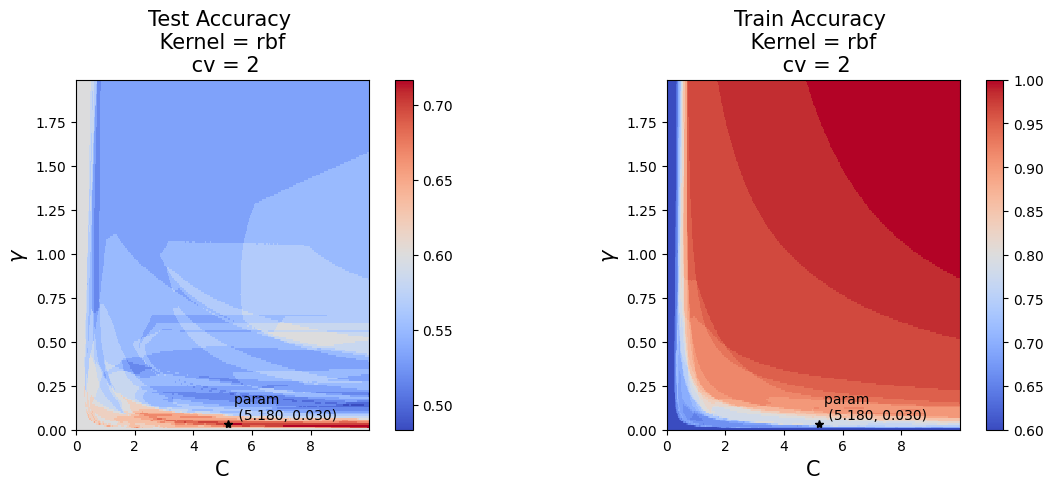

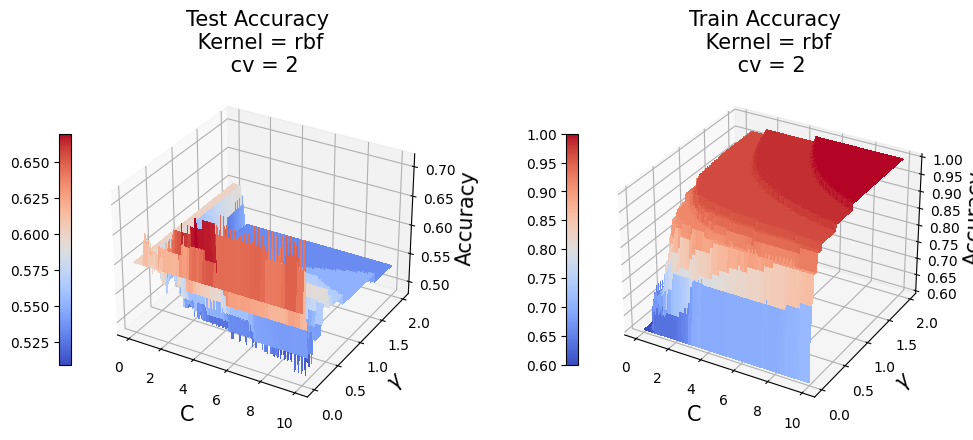

In [22]:
# cv = 2, kl = rbf, plot_surface and im_show

print('\n ########################################################################## \n')

best_score_cv2, best_hyperparams_cv2 = param_svm_search(X_train_sc,y_train,
                                                             2,hyper_params,c,gamma,
                                                             './figs/im_cv2_IM','./figs/surf_cv2_IM',
                                                             kl ="rbf",rnd_st=1234)
# cv is optimal if |best_test_score - best_train_score| is minimum

print("Highest test score found by GridSearchCV = " + str(best_score_cv2))
print("Best hyperparameters found by GridSearchCV = " + str(best_hyperparams_cv2))

# print("BestParam test score found from surface plot = " + str(best_test_sc_cv2))
# print("BestParam train score found from surface plot = " + str(best_train_sc_cv2))
# print("|bestParam_test_sc - bestParam_train_sc| =" + str(np.abs(best_test_sc_cv2 - best_train_sc_cv2)))


 ########################################################################## 

Fitting 3 folds for each of 200000 candidates, totalling 600000 fits
Highest test score found by GridSearchCV = 0.7166666666666667
Best hyperparameters found by GridSearchCV = {'C': 7.48, 'gamma': 0.02}


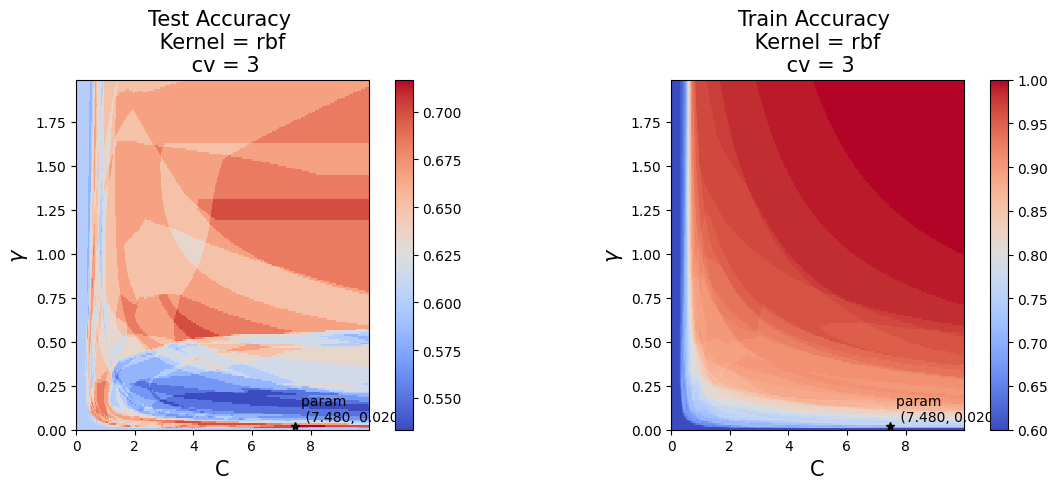

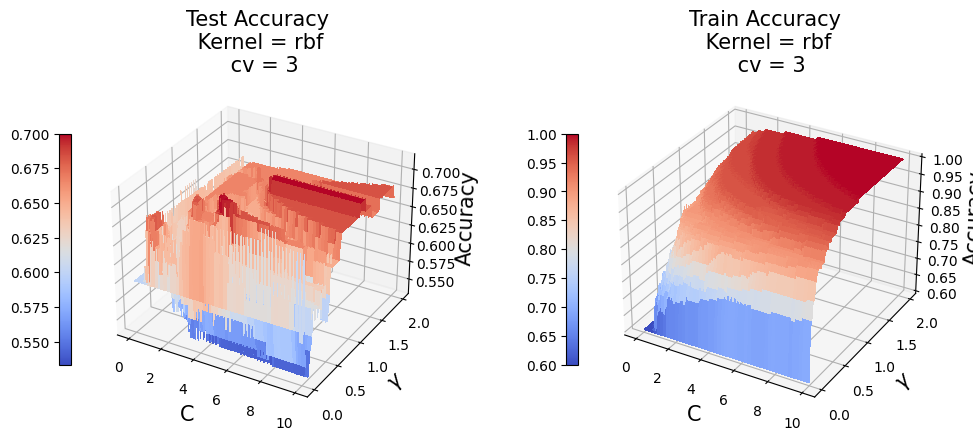

In [23]:
# cv = 3, kl = rbf, plot_surface and im_show

print('\n ########################################################################## \n')

best_score_cv3, best_hyperparams_cv3  = param_svm_search(X_train_sc,y_train,
                                                              3,hyper_params,c,gamma,
                                                              './figs/im_cv3_IM','./figs/surf_cv3_IM',
                                                              kl ="rbf",rnd_st=1234)
# cv is optimal if |best_test_score - best_train_score| is minimum

print("Highest test score found by GridSearchCV = " + str(best_score_cv3))
print("Best hyperparameters found by GridSearchCV = " + str(best_hyperparams_cv3))

# print("BestParam test score found from surface plot = " + str(best_test_sc_cv3))
# print("BestParam train score found from surface plot = " + str(best_train_sc_cv3))
# print("|bestParam_test_sc - bestParam_train_sc| =" + str(np.abs(best_test_sc_cv3 - best_train_sc_cv3)))


 ########################################################################## 

Fitting 4 folds for each of 200000 candidates, totalling 800000 fits
Highest test score found by GridSearchCV = 0.6833333333333333
Best hyperparameters found by GridSearchCV = {'C': 4.53, 'gamma': 0.03}


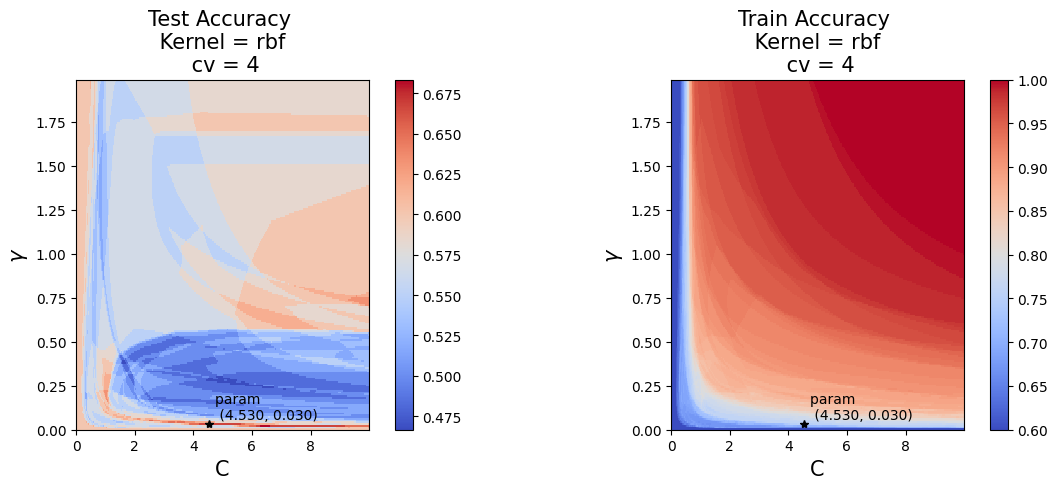

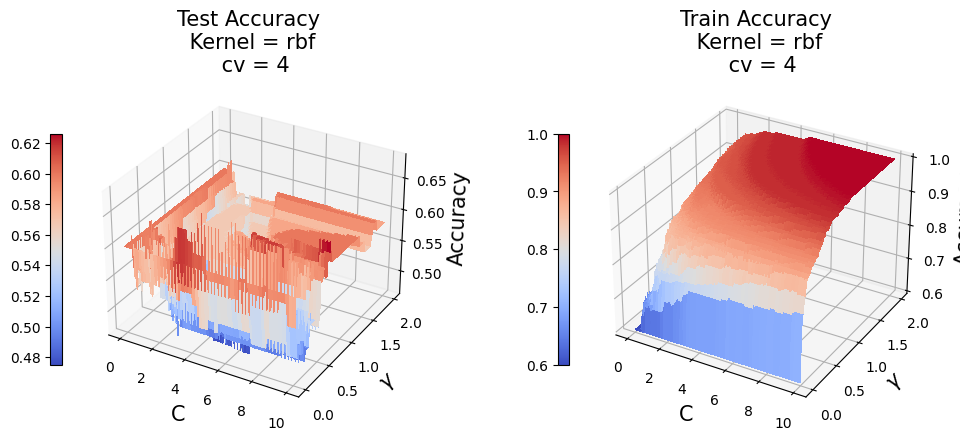

In [24]:
# cv = 4, kl = rbf, plot_surface and im_show

print('\n ########################################################################## \n')

best_score_cv4, best_hyperparams_cv4  = param_svm_search(X_train_sc,y_train,
                                                              4,hyper_params,c,gamma,
                                                              './figs/im_cv4_IM','./figs/surf_cv4_IM',
                                                              kl ="rbf",rnd_st=1234)
# cv is optimal if |best_test_score - best_train_score| is minimum

print("Highest test score found by GridSearchCV = " + str(best_score_cv4))
print("Best hyperparameters found by GridSearchCV = " + str(best_hyperparams_cv4))

# print("BestParam test score found from surface plot = " + str(best_test_sc_cv4))
# print("BestParam train score found from surface plot = " + str(best_train_sc_cv4))
# print("|bestParam_test_sc - bestParam_train_sc| =" + str(np.abs(best_test_sc_cv4 - best_train_sc_cv4)))


 ########################################################################## 

Fitting 5 folds for each of 200000 candidates, totalling 1000000 fits
Highest test score found by GridSearchCV = 0.75
Best hyperparameters found by GridSearchCV = {'C': 6.49, 'gamma': 0.44}


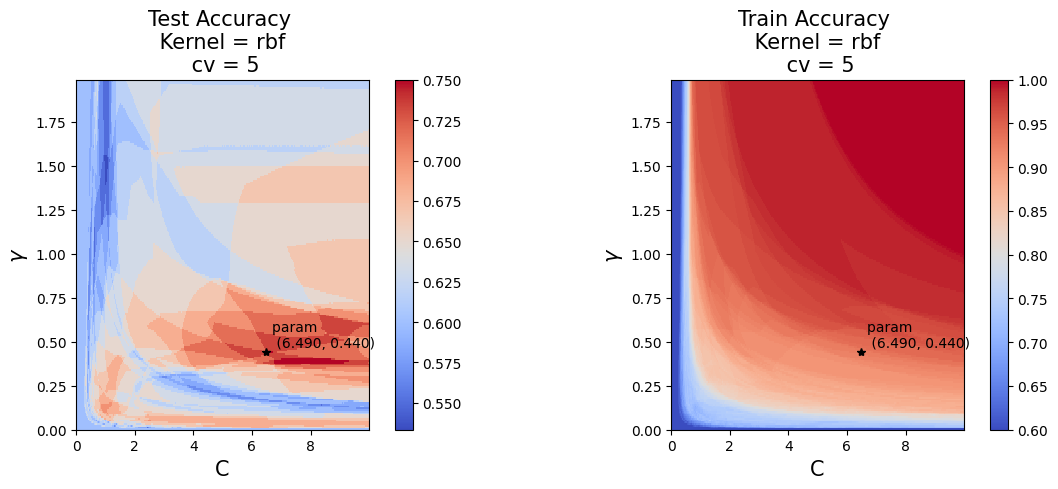

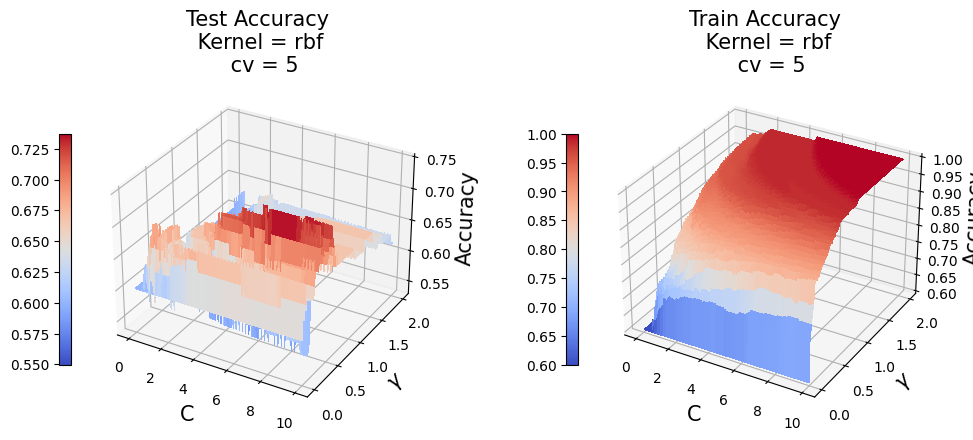

In [25]:
# cv = 5, kl = rbf, plot_surface and im_show

print('\n ########################################################################## \n')

best_score_cv5, best_hyperparams_cv5  = param_svm_search(X_train_sc,y_train,
                                                              5,hyper_params,c,gamma,
                                                              './figs/im_cv5_IM','./figs/surf_cv5_IM',
                                                              kl ="rbf",rnd_st=1234)
# cv is optimal if |best_test_score - best_train_score| is minimum

print("Highest test score found by GridSearchCV = " + str(best_score_cv5))
print("Best hyperparameters found by GridSearchCV = " + str(best_hyperparams_cv5))

# print("BestParam test score found from surface plot = " + str(best_test_sc_cv5))
# print("BestParam train score found from surface plot = " + str(best_train_sc_cv5))
# print("|bestParam_test_sc - bestParam_train_sc| =" + str(np.abs(best_test_sc_cv5 - best_train_sc_cv5)))


 ########################################################################## 

Fitting 6 folds for each of 200000 candidates, totalling 1200000 fits
Highest test score found by GridSearchCV = 0.7000000000000001
Best hyperparameters found by GridSearchCV = {'C': 8.01, 'gamma': 0.01}


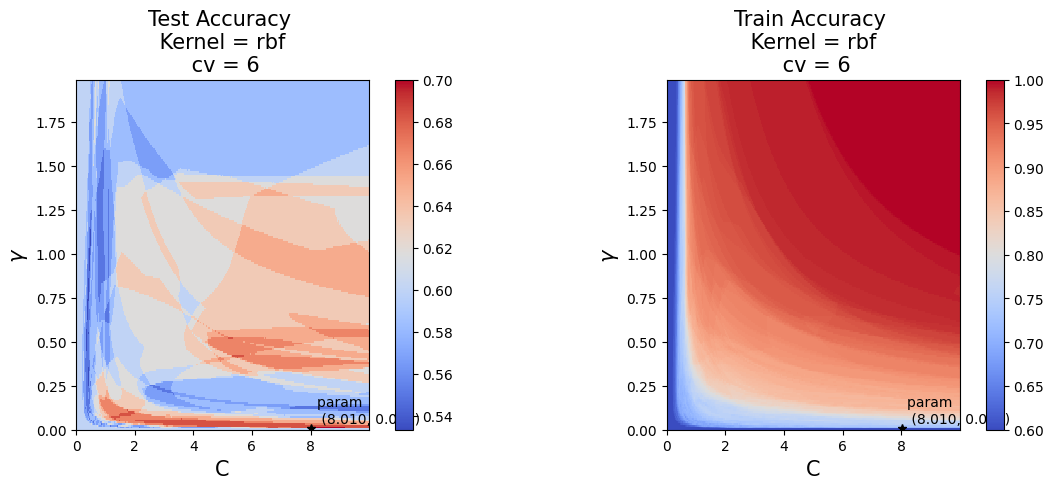

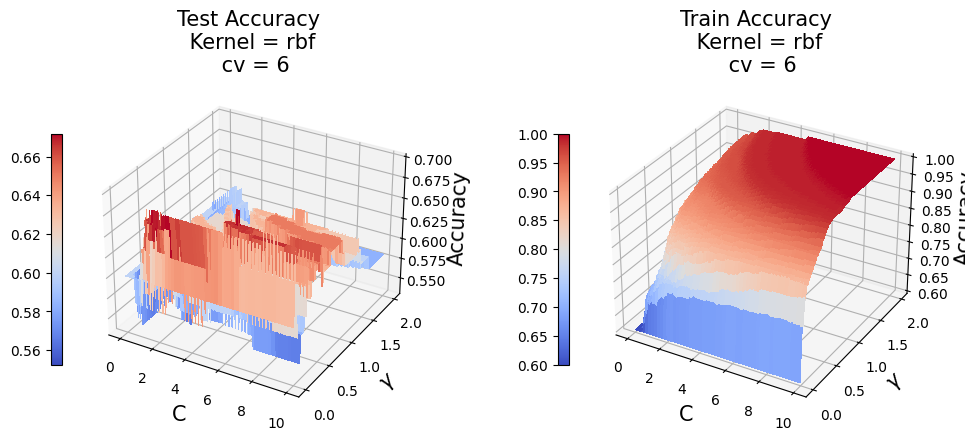

In [26]:
# cv = 6, kl = rbf, plot_surface and im_show

print('\n ########################################################################## \n')

best_score_cv6, best_hyperparams_cv6  = param_svm_search(X_train_sc,y_train,
                                                              6,hyper_params,c,gamma,
                                                              './figs/im_cv6_IM','./figs/surf_cv6_IM',
                                                              kl ="rbf",rnd_st=1234)
# cv is optimal if |best_test_score - best_train_score| is minimum

print("Highest test score found by GridSearchCV = " + str(best_score_cv6))
print("Best hyperparameters found by GridSearchCV = " + str(best_hyperparams_cv6))

# print("BestParam test score found from surface plot = " + str(best_test_sc_cv6))
# print("BestParam train score found from surface plot = " + str(best_train_sc_cv6))
# print("|bestParam_test_sc - bestParam_train_sc| =" + str(np.abs(best_test_sc_cv6 - best_train_sc_cv6)))


 ########################################################################## 

Fitting 7 folds for each of 200000 candidates, totalling 1400000 fits
Highest test score found by GridSearchCV = 0.7142857142857143
Best hyperparameters found by GridSearchCV = {'C': 2.13, 'gamma': 0.12}


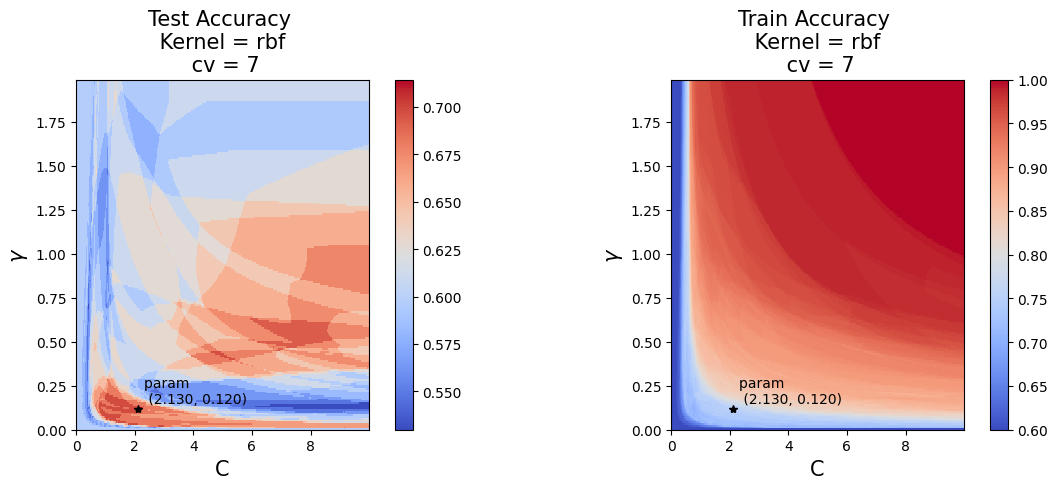

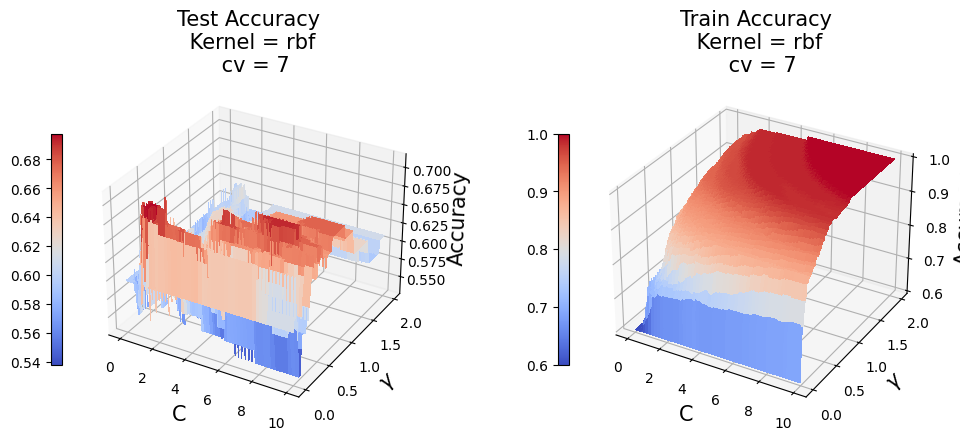

In [27]:
# cv = 7, kl = rbf, plot_surface and im_show

print('\n ########################################################################## \n')

best_score_cv7, best_hyperparams_cv7  = param_svm_search(X_train_sc,y_train,
                                                              7,hyper_params,c,gamma,
                                                              './figs/im_cv7_IM','./figs/surf_cv7_IM',
                                                              kl ="rbf",rnd_st=1234)
# cv is optimal if |best_test_score - best_train_score| is minimum

print("Highest test score found by GridSearchCV = " + str(best_score_cv7))
print("Best hyperparameters found by GridSearchCV = " + str(best_hyperparams_cv7))

# print("BestParam test score found from surface plot = " + str(best_test_sc_cv7))
# print("BestParam train score found from surface plot = " + str(best_train_sc_cv7))
# print("|bestParam_test_sc - bestParam_train_sc| =" + str(np.abs(best_test_sc_cv7 - best_train_sc_cv7)))


 ########################################################################## 

Fitting 8 folds for each of 200000 candidates, totalling 1600000 fits
Highest test score found by GridSearchCV = 0.7008928571428572
Best hyperparameters found by GridSearchCV = {'C': 2.62, 'gamma': 0.06}


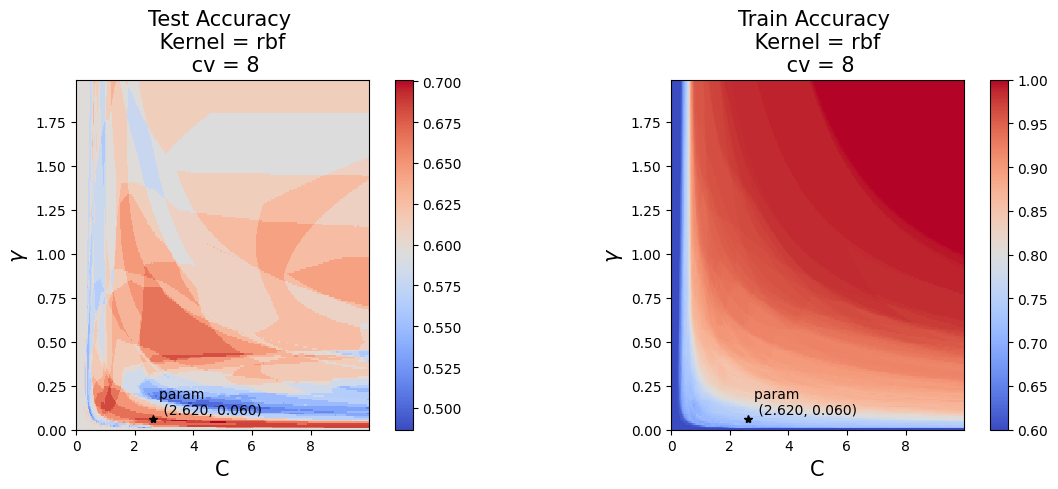

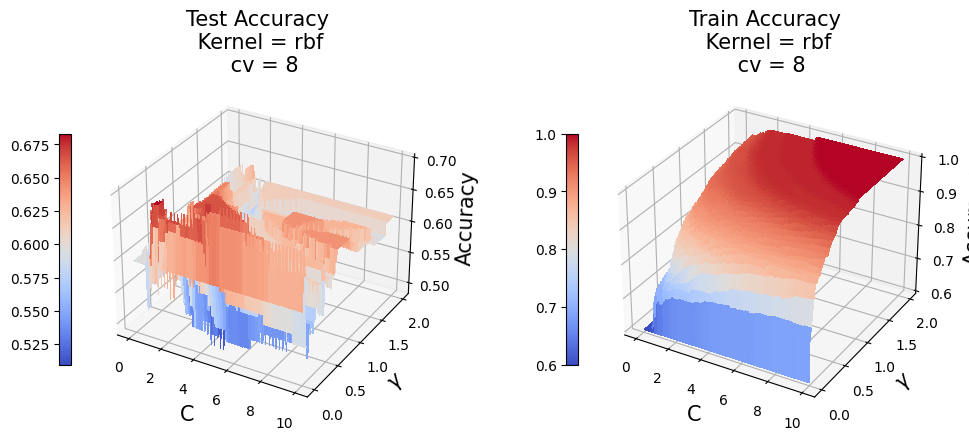

In [28]:
# cv = 8, kl = rbf, plot_surface and im_show

print('\n ########################################################################## \n')

best_score_cv8, best_hyperparams_cv8  = param_svm_search(X_train_sc,y_train,
                                                              8,hyper_params,c,gamma,
                                                              './figs/im_cv8_IM','./figs/surf_cv8_IM',
                                                              kl ="rbf",rnd_st=1234)
# cv is optimal if |best_test_score - best_train_score| is minimum

print("Highest test score found by GridSearchCV = " + str(best_score_cv8))
print("Best hyperparameters found by GridSearchCV = " + str(best_hyperparams_cv8))

# print("BestParam test score found from surface plot = " + str(best_test_sc_cv8))
# print("BestParam train score found from surface plot = " + str(best_train_sc_cv8))
# print("|bestParam_test_sc - bestParam_train_sc| =" + str(np.abs(best_test_sc_cv8 - best_train_sc_cv8)))


 ########################################################################## 

Fitting 9 folds for each of 200000 candidates, totalling 1800000 fits
Highest test score found by GridSearchCV = 0.701058201058201
Best hyperparameters found by GridSearchCV = {'C': 1.0, 'gamma': 0.13}


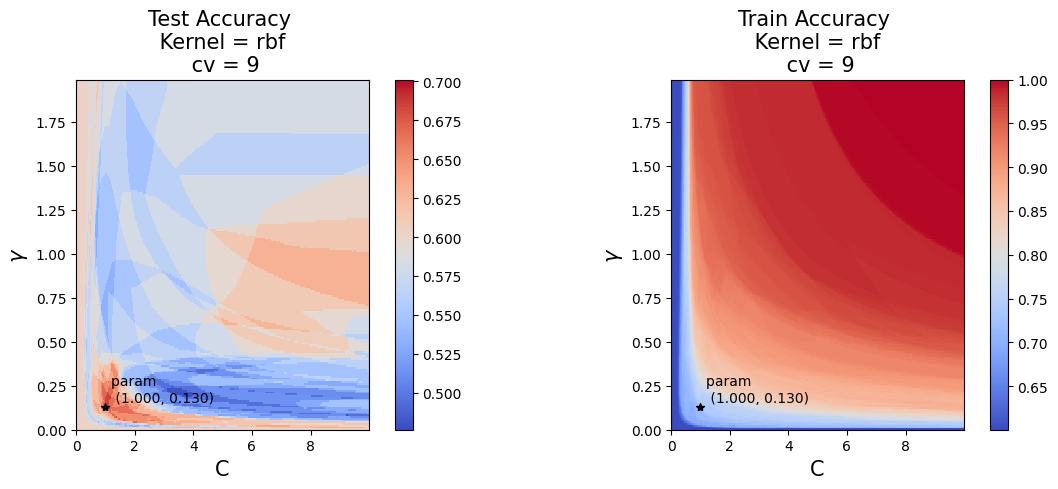

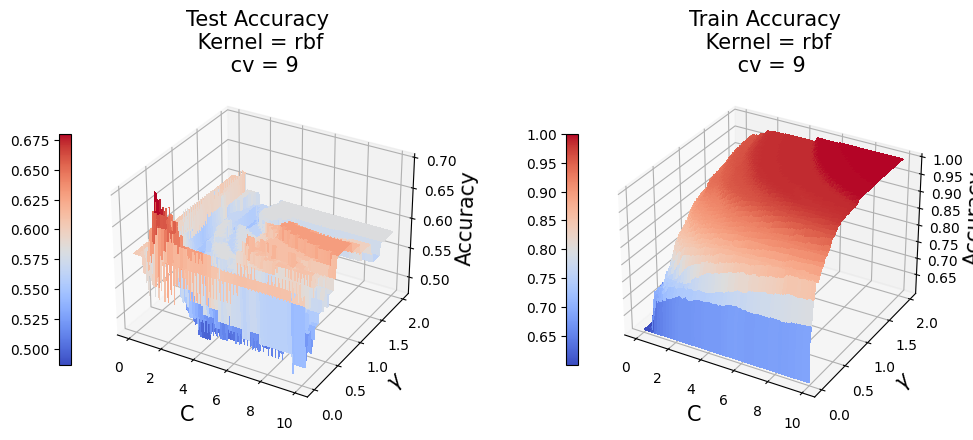

In [29]:
# cv = 9, kl = rbf, plot_surface and im_show

print('\n ########################################################################## \n')

best_score_cv9, best_hyperparams_cv9  = param_svm_search(X_train_sc,y_train,
                                                              9,hyper_params,c,gamma,
                                                              './figs/im_cv9_IM','./figs/surf_cv9_IM',
                                                              kl ="rbf",rnd_st=1234)
# cv is optimal if |best_test_score - best_train_score| is minimum

print("Highest test score found by GridSearchCV = " + str(best_score_cv9))
print("Best hyperparameters found by GridSearchCV = " + str(best_hyperparams_cv9))

# print("BestParam test score found from surface plot = " + str(best_test_sc_cv9))
# print("BestParam train score found from surface plot = " + str(best_train_sc_cv9))
# print("|bestParam_test_sc - bestParam_train_sc| =" + str(np.abs(best_test_sc_cv9 - best_train_sc_cv9)))


 ########################################################################## 

Fitting 10 folds for each of 200000 candidates, totalling 2000000 fits
Highest test score found by GridSearchCV = 0.7000000000000001
Best hyperparameters found by GridSearchCV = {'C': 0.89, 'gamma': 0.12}


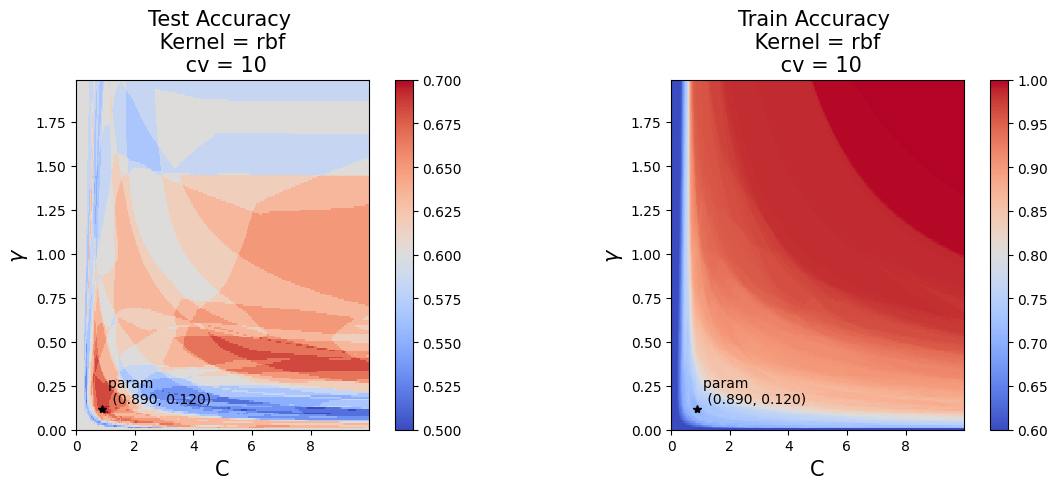

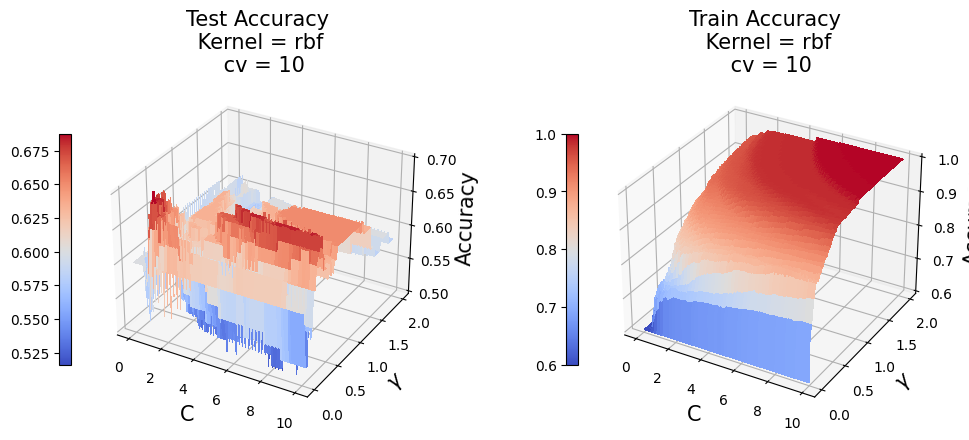

In [30]:
# cv = 10, kl = rbf, plot_surface and im_show

print('\n ########################################################################## \n')

best_score_cv10, best_hyperparams_cv10  = param_svm_search(X_train_sc,y_train,
                                                                10,hyper_params,c,gamma,
                                                                './figs/im_cv10_IM','./figs/surf_cv10_IM',
                                                                kl ="rbf",rnd_st=1234)
# cv is optimal if |best_test_score - best_train_score| is minimum

print("Highest test score found by GridSearchCV = " + str(best_score_cv10))
print("Best hyperparameters found by GridSearchCV = " + str(best_hyperparams_cv10))

# print("BestParam test score found from surface plot = " + str(best_test_sc_cv10))
# print("BestParam train score found from surface plot = " + str(best_train_sc_cv10))
# print("|bestParam_test_sc - bestParam_train_sc| =" + str(np.abs(best_test_sc_cv10 - best_train_sc_cv10)))

In [31]:
print(best_hyperparams_cv2)

{'C': 5.18, 'gamma': 0.03}


In [32]:
# Open the file in append mode and write results

with open("best_hyperparams_cv_2_10_IM.txt", "a") as f:
    f.write(f"{best_hyperparams_cv2['C']}, {best_hyperparams_cv2['gamma']}\n")  # Append the output to a new line
    f.write(f"{best_hyperparams_cv3['C']}, {best_hyperparams_cv3['gamma']}\n")  # Append the output to a new line
    f.write(f"{best_hyperparams_cv4['C']}, {best_hyperparams_cv4['gamma']}\n")  # Append the output to a new line
    f.write(f"{best_hyperparams_cv5['C']}, {best_hyperparams_cv5['gamma']}\n")  # Append the output to a new line
    f.write(f"{best_hyperparams_cv6['C']}, {best_hyperparams_cv6['gamma']}\n")  # Append the output to a new line
    f.write(f"{best_hyperparams_cv7['C']}, {best_hyperparams_cv7['gamma']}\n")  # Append the output to a new line
    f.write(f"{best_hyperparams_cv8['C']}, {best_hyperparams_cv8['gamma']}\n")  # Append the output to a new line
    f.write(f"{best_hyperparams_cv9['C']}, {best_hyperparams_cv9['gamma']}\n")  # Append the output to a new line
    f.write(f"{best_hyperparams_cv10['C']}, {best_hyperparams_cv10['gamma']}\n")  # Append the output to a new line
    